# STTN623 Assignment 1
#### *Authors: Tafara Kanyemba & Tapiwa Gweshe*

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Markdown, display


# Question 1

In [3]:
airpol_df = pd.read_csv('airpol.csv')
print(airpol_df)

    Wind  Solar Rad  CO  NO  NO2  O3  HC
0      8         98   7   2   12   8   2
1      7        107   4   3    9   5   3
2      7        103   4   3    5   6   3
3     10         88   5   2    8  15   4
4      6         91   4   2    8  10   3
5      8         90   5   2   12  12   4
6      9         84   7   4   12  15   5
7      5         72   6   4   21  14   4
8      7         82   5   1   11  11   3
9      8         64   5   2   13   9   4
10     6         71   5   4   10   3   3
11     6         91   4   2   12   7   3
12     7         72   7   4   18  10   3
13    10         70   4   2   11   7   3
14    10         72   4   1    8  10   3
15     9         77   4   1    9  10   3
16     8         76   4   1    7   7   3
17     8         71   5   3   16   4   4
18     9         67   4   2   13   2   3
19     9         69   3   3    9   5   3
20    10         62   5   3   14   4   4
21     9         88   4   2    7   6   3
22     8         80   4   2   13  11   4
23     5        

In [4]:
# Determine continuous vs. non-continuous variables
# Select numeric columns
numeric_cols = airpol_df.select_dtypes(include=[np.number]).columns.tolist()

# Define a threshold for “continuous” (e.g. more than 10 distinct values)
threshold = 10
continuous_vars = [col for col in numeric_cols 
                   if airpol_df[col].nunique() > threshold]

# Everything else is treated as non-continuous
non_continuous_vars = [col for col in airpol_df.columns 
                       if col not in continuous_vars]

print("Continuous variables:", continuous_vars)
print("Non-continuous variables:", non_continuous_vars)

Continuous variables: ['Solar Rad', 'NO2', 'O3']
Non-continuous variables: ['Wind', 'CO', 'NO', 'HC']


## Covariance and variance formula 
### Sample Covariance and Variance Formulas

**Sample Covariance between X and Y:**

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$

**Sample Variance of X:**

$$
\text{Var}(X) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}
$$
> *Markdown generated using GenAI*

In [17]:
# extract the two variables: NO2 and Solar Rad
no2 = airpol_df['NO2']
solar_rad = airpol_df['Solar Rad']

# calculate the means
mean_no2 = no2.mean()
mean_solar = solar_rad.mean()

# compute the covariance numerator by summing over the product of deviations
numerator = ((no2 - mean_no2) * (solar_rad - mean_solar)).sum()

# for sample covariance, divide by (n - 1)
n = len(no2)
covariance = numerator / (n - 1)

print("Covariance:", covariance)

# Compute sample variances using first principles
var_no2 = ((no2 - mean_no2) ** 2).sum() / (n - 1)
var_solar = ((solar_rad - mean_solar) ** 2).sum() / (n - 1)

print("variance for NO2:", var_no2)
print("variance for solar rad:", var_solar)

cov_var_matrix = np.array([[var_no2, covariance],
                           [covariance, var_solar]])
print("Covariance-Variance Matrix:")
print(cov_var_matrix)

# now get the correlation between the 2 variables using first principles
std_no2 = np.sqrt(var_no2)  # standard deviation of NO2
std_solar = np.sqrt(var_solar)  # standard deviation of solar rad
correlation = covariance / (std_no2 * std_solar)
print("Correlation:", correlation)

# compute the correlation matrix 
correlation_matrix = np.array([[1, correlation],
                               [correlation, 1]])
print("Correlation Matrix:")
print(correlation_matrix)


Covariance: 6.763066202090593
variance for NO2: 11.363530778164925
variance for solar rad: 300.51567944250877
Covariance-Variance Matrix:
[[ 11.36353078   6.7630662 ]
 [  6.7630662  300.51567944]]
Correlation: 0.11573199090089906
Correlation Matrix:
[[1.         0.11573199]
 [0.11573199 1.        ]]


The question directs us to be more interested in the relationship between the variables. We have commited to expressing this relationship in terms of vectors, and thus will the correlation.

We start by centering the variables:

$$
x = \text{NO2} - \text{mean\_NO2} \quad \text{and} \quad y = \text{solar\_rad} - \text{mean\_solar}
$$

The dot product of the centered variables gives the covariance (up to the normalization factor):

$$
\text{covariance} = \frac{x^T y}{n-1}
$$

Thus, the correlation can be written as:

$$
\text{correlation} = \frac{x^T y}{(n-1)\,\text{std\_NO2}\,*\text{std\_solar}}
$$

Alternatively, if we form the matrix \( A \) with the centered variables as columns,

$$
A = \begin{bmatrix} x & y \end{bmatrix},
$$

then the covariance matrix is

$$
\text{Cov} = \frac{A^T A}{n-1},
$$

and the off-diagonal element of $\text{Cov}$ is exactly $\frac{x^T y}{n-1}$. Therefore, the correlation is

$$
\text{correlation} = \frac{\text{Cov}[0,1]}{\text{std\_NO2}\,*\text{std\_solar}}.
$$

#### Using Correlation to Find the Angle Between Vectors

In our analysis, remember that the correlation between the centered variables (NO2 and solar radiation) is defined as the cosine of the angle between their corresponding vectors:

$$
\cos(\theta) = \text{correlation}
$$

This means if we know the correlation value, we can recover the angle between the two vectors by computing the arccosine. For example, in Python using NumPy, you can compute the angle (in radians) as:

$$
\theta = \arccos(\text{correlation})
$$

To convert this angle to degrees, use:

$$
\theta_{degrees} = \theta \times \frac{180}{\pi}
$$

Thus, the correlation not only tells us about the strength of the linear relationship but also directly informs us of the geometric angle between the centered variable vectors.

The notation **[0,1]** in the covariance matrix is used to refer to the position of the element representing the covariance between the two variables. In a 2x2 covariance matrix, the indices are zero-based, meaning:

- **0** represents the first variable (e.g., wind).
- **1** represents the second variable (e.g., solar radiation).

Thus, **Cov[0,1]** is the element in the first row and second column of the matrix, which holds the covariance between these two variables. This convention is common in programming and mathematical notation when dealing with arrays or matrices.
> *GenAI used to answer why we use the notation of Cov(0,1)*

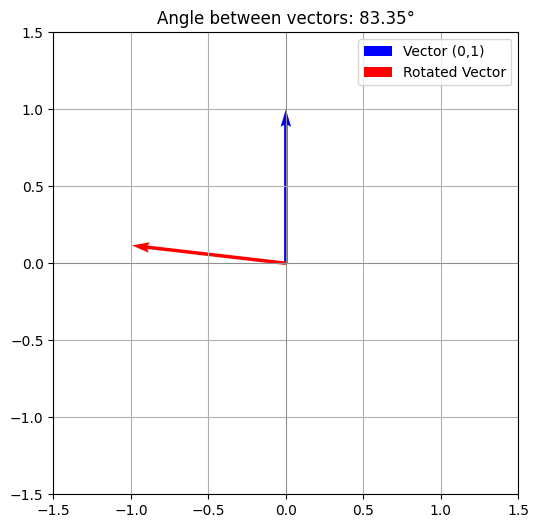

Correlation: 0.11573199090089906
Angle (radians): 1.454804415891728
Angle (degrees): 83.35415304759096


In [19]:
# Plotting an arbitrary vector and its rotated counterpart using correlation-derived angle
import numpy as np
import matplotlib.pyplot as plt

# Use existing correlation if defined; otherwise, use an arbitrary value

corr = correlation


# Calculate angle (in radians) from the correlation (assuming correlation = cos(theta))
theta = np.arccos(corr)
theta_deg = np.degrees(theta)

# Define the arbitrary vector (0,1)
vec1 = np.array([0, 1])

# Compute the rotated vector by applying a rotation matrix to vec1
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                              [np.sin(theta),  np.cos(theta)]])
vec2 = rotation_matrix.dot(vec1)

# Plot the vectors starting from the origin
plt.figure(figsize=(6,6))
plt.quiver(0, 0, vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector (0,1)')
plt.quiver(0, 0, vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='red', label='Rotated Vector')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.legend()
plt.title(f'Angle between vectors: {theta_deg:.2f}°')
plt.grid(True)
plt.show()

print('Correlation:', corr)
print('Angle (radians):', theta)
print('Angle (degrees):', theta_deg)

## Insight Questions

When analyzing data, centering the variables (i.e., subtracting the mean) lets us focus on the essential relationship between them. Consider two centered variables, \( x \) and \( y \). Their covariance is given by

$$
\text{Cov}(x, y) = \frac{1}{n-1} \sum_{i=1}^{n} x_i\,y_i = \frac{x^T y}{n-1}.
$$

We can summarize the variances and covariance in matrix form as follows:

$$
\mathbf{Cov} =
\begin{bmatrix}
\text{Var}(x) & \text{Cov}(x, y) \\\\
\text{Cov}(x, y) & \text{Var}(y)
\end{bmatrix},
$$

where the variances are defined by

$$
\text{Var}(x) = \frac{\sum_{i=1}^{n} x_i^2}{n-1} \quad \text{and} \quad \text{Var}(y) = \frac{\sum_{i=1}^{n} y_i^2}{n-1}.
$$

The correlation between \( x \) and \( y \) is obtained by normalizing the covariance with the corresponding standard deviations:

$$
\text{Correlation} = \frac{\text{Cov}(x, y)}{\sigma_x\, \sigma_y},
$$

which is equivalent to expressing the correlation as the cosine of the angle between the vectors:

$$
\cos(\theta) = \frac{\text{Cov}(x, y)}{\sigma_x\, \sigma_y}.
$$

Thus, if the covariance is zero

$$
\text{Cov}(x, y) = 0,
$$

then

$$
\text{Correlation} = 0 \quad \text{and} \quad \cos(\theta) = 0,
$$

indicating that the centered variables (or vectors) are orthogonal. Orthogonality in this context implies that there is no linear relationship between the variables, often taken as a sign of independence.

# Question 2

In [5]:
# 1. Subset only the continuous variables
cont_df = airpol_df[continuous_vars]

# 2. Convert to NumPy array and get sample size
X = cont_df.to_numpy()
n = X.shape[0]

# 3. Center each column (variable) by subtracting its mean
means = X.mean(axis=0)
Xc = X - means

# 4. Manually compute the p×p covariance matrix Σ
p = Xc.shape[1]
Sigma = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        # dot product of centered columns i and j, divided by (n−1)
        Sigma[i, j] = (Xc[:, i] * Xc[:, j]).sum() / (n - 1)

# 5. Display with variable names
Sigma_df = pd.DataFrame(Sigma, index=continuous_vars, columns=continuous_vars)
print("Sample covariance matrix Σ:")
print(Sigma_df)

Sample covariance matrix Σ:
            Solar Rad        NO2         O3
Solar Rad  300.515679   6.763066  30.790941
NO2          6.763066  11.363531   3.126597
O3          30.790941   3.126597  30.978513


In [ ]:

# Check symmetry and compute eigenvalues from first principles
def check_matrix_properties(A):
    n = len(A)
    
    # Check symmetry
    is_symmetric = True
    for i in range(n):
        for j in range(n):
            if abs(A[i,j] - A[j,i]) > 1e-10:
                is_symmetric = False
                break
    
    # Power iteration method to find eigenvalues
    # This function was generated with the help of GenAI
    def power_iteration(A, num_iterations=1000, tolerance=1e-10):
        n = len(A)
        v = np.random.rand(n)
        v = v / np.linalg.norm(v)
        
        for _ in range(num_iterations):
            Av = A @ v
            v_new = Av / np.linalg.norm(Av)
            
            # Check convergence
            if np.allclose(abs(v), abs(v_new), rtol=tolerance):
                break
                
            v = v_new
            
        eigenvalue = (v @ (A @ v)) / (v @ v)
        return eigenvalue, v
    
    # Find all eigenvalues using deflation
    eigenvalues = []
    A_remaining = A.copy()
    
    for i in range(n):
        eigenvalue, eigenvector = power_iteration(A_remaining)
        eigenvalues.append(eigenvalue)
        
        # Deflate the matrix
        if i < n-1:  # No need to deflate on last iteration
            v = eigenvector.reshape(-1, 1)
            A_remaining = A_remaining - eigenvalue * (v @ v.T)
    
    eigenvalues = np.array(eigenvalues)
    
    # Check positive definiteness
    is_positive_definite = all(eigenvalues > 0)
    
    return {
        'is_symmetric': is_symmetric,
        'eigenvalues': eigenvalues,
        'is_positive_definite': is_positive_definite,
        'min_eigenvalue': min(eigenvalues)
    }

# Apply the check to our covariance matrix
results = check_matrix_properties(Sigma_df.to_numpy())

print(f"Is Sigma symmetric? {results['is_symmetric']}")
print(f"\nEigenvalues: {results['eigenvalues']}")
print(f"Is Sigma positive definite? {results['is_positive_definite']}")
print(f"Minimum eigenvalue: {results['min_eigenvalue']}")

Is Sigma symmetric? True

Eigenvalues: [304.1591513   27.83710269  10.86146959]
Is Sigma positive definite? True
Minimum eigenvalue: 10.861469588968417


### Q2 - Insight

* **Why $\Sigma$ is symmetric & PSD.**
  By construction $\Sigma=\operatorname{Cov}(X)=\mathbb{E}\!\left[(X-\mu)(X-\mu)^{\top}\right]$. Outer products are symmetric, so $\Sigma^{\top}=\Sigma$. For any vector $c$,

  $$
  \operatorname{Var}(c^{\top}X)=c^{\top}\Sigma c \ge 0,
  $$

  hence $\Sigma$ is **positive semi-definite**. In sample form $\tfrac{1}{n-1}X_c^{\top}X_c$, it’s a Gram matrix - same conclusion.

* **What a zero eigenvalue means.**
  Eigenvalues of $\Sigma$ are variances along orthogonal directions. If some $\lambda_i=0$, variance is **zero** in that direction: the variables are **exactly linearly dependent**, the data lie in a **lower-dimensional subspace**, $\mathrm{rank}(\Sigma)<p$, and $|\Sigma|=0$ (singular).



# Question 3


In [ ]:
# Spectral decomposition of a symmetric matrix
# Define the matrix A
A = np.array([[13, -4, 2],
              [-4, 13, -2],
              [2, -2, 10]])

# Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(A)

print("Eigenvalues:")
print(eigvals)
print("\nNormalized Eigenvectors (columns):")
print(eigvecs)

# Spectral decomposition: A = P D P^T
P = eigvecs
D = np.diag(eigvals)
PT = P.T
A_reconstructed = P @ D @ PT

print("\nSpectral Decomposition (A reconstructed):")
print(A_reconstructed)

# Check if A_reconstructed is close to A
diff=A - A_reconstructed
print("\nDifference between original and reconstructed A (should be close to zero):")
print(diff)



Eigenvalues:
[ 9.  9. 18.]

Normalized Eigenvectors (columns):
[[-0.74535599  0.          0.66666667]
 [-0.59628479  0.4472136  -0.66666667]
 [ 0.2981424   0.89442719  0.33333333]]

Spectral Decomposition (A reconstructed):
[[13. -4.  2.]
 [-4. 13. -2.]
 [ 2. -2. 10.]]

Difference between original and reconstructed A (should be close to zero):
[[-1.77635684e-15  8.88178420e-16 -4.44089210e-16]
 [ 1.77635684e-15  1.77635684e-15 -2.22044605e-16]
 [-4.44089210e-16 -2.22044605e-16  0.00000000e+00]]


### Eigenvalues, Eigenvectors, and Spectral Decomposition

Given the matrix:

$$
A = \begin{bmatrix} 13 & -4 & 2 \\ -4 & 13 & -2 \\ 2 & -2 & 10 \end{bmatrix}
$$

We compute its **eigenvalues** and **normalized eigenvectors**. The spectral decomposition expresses $A$ in the quadratic form of:

$$
A = P D P^T
$$

where:
- $P$ is the matrix whose columns are the normalized eigenvectors of $A$,
- $D$ is a diagonal matrix with the eigenvalues of $A$ on the diagonal,
- $P^T$ is the transpose of $P$.

#### Why are eigenvalues and eigenvectors important?

- **Simplifying Computations:**
  - Diagonalizing a matrix (writing it as $A = P D P^T$) makes many computations much easier. For example, raising $A$ to a power, computing exponentials, or solving systems involving $A$ become straightforward when $A$ is diagonalized.
  - In the diagonal form, the action of $A$ on its eigenvectors is simply scaling by the corresponding eigenvalue.

- **Geometric Insight:**
  - The eigenvectors of $A$ point in the directions where the transformation $A$ acts as a simple scaling (no rotation).
  - The eigenvalues tell us how much $A$ stretches or shrinks along each eigenvector direction.

- **Applications:**
  - In data analysis (e.g., PCA), the eigenvectors of the covariance matrix indicate directions of maximum variance.

**In summary:**
> Eigenvalues and eigenvectors provide a powerful way to understand and simplify the action of a matrix, making complex computations more tractable and revealing the fundamental structure of linear transformations.

# Question 4


#### Theoretical Derivation of $\mathbb{E}(AX)$ and $\mathrm{Cov}(AX)$

Let $X$ be a random vector in $\mathbb{R}^n$ with mean $\mu_X = \mathbb{E}[X]$ and covariance matrix $\Sigma_X = \mathrm{Cov}(X)$. Let $A$ be a $k \times n$ matrix.

**1. Expectation of a Linear Transformation:**

$$
\mathbb{E}[AX] = A\,\mathbb{E}[X] = A\mu_X
$$

This follows from the linearity of expectation.

**2. Covariance of a Linear Transformation:**

$$
\mathrm{Cov}(AX) = \mathbb{E}\big[(AX - \mathbb{E}[AX])(AX - \mathbb{E}[AX])^T\big]
$$

Expanding the terms:

$$
= \mathbb{E}\big[A(X - \mu_X)(X - \mu_X)^T A^T\big]
$$

Since $A$ is constant, it can be factored out:

$$
= A\,\mathbb{E}\big[(X - \mu_X)(X - \mu_X)^T\big]A^T
$$

But $\mathbb{E}\big[(X - \mu_X)(X - \mu_X)^T\big] = \Sigma_X$, so:

$$
\mathrm{Cov}(AX) = A\Sigma_X A^T
$$

Thus, the mean and covariance of the transformed vector $AX$ are given by:

- $\mathbb{E}[AX] = A\mu_X$
- $\mathrm{Cov}(AX) = A\Sigma_X A^T$

In [ ]:
# Compute E[AX] and Cov(AX) using the formulas from the derivation

# Define the transformation matrix A
#(3x4)
A = np.array([[1, -1,0,0],
              [1, 1,-2,0],
              [1,1,1,3]])

# Compute mean vector mu_X (4x1)
mu_X = np.array([3,2,-2,0])

# Compute covariance matrix Sigma_X
Sigma_X = np.array([[3,0,0,0],
                   [0,3,0,0],
                   [0,0,3,0],
                   [0,0,0,3]]
                   )

# Compute E[AX]
E_AX = A @ mu_X
print("E[AX]:", E_AX)

# Compute Cov(AX)
Cov_AX = A @ Sigma_X @ A.T
print("Cov(AX):\n", Cov_AX)

E[AX]: [1 9 3]
Cov(AX):
 [[ 6  0  0]
 [ 0 18  0]
 [ 0  0 36]]


>   The off-diagonals are all 0, indicating that all variables are uncorrelated since they have a covariance = 0.


### Q4 - Insight
Linear Combinations in Factor Analysis

In factor analysis, linear combinations of the original variables are used to create new variables called factors. These factors are constructed to capture most of the variance in the data using fewer variables than the original set. This process reduces the dimensionality of the data, making it easier to analyze and interpret.

By representing the data with a smaller number of factors, we achieve computational efficiency and simplify complex datasets. The main goal is to explain the observed correlations among variables with as few factors as possible, thus reducing redundancy and focusing on the underlying structure of the data.

Additionally, factor analysis helps to isolate the most important information in the dataset by identifying the key underlying factors that drive the observed patterns. This allows analysts to focus on the most significant sources of variation and ignore less relevant details.

#### What does it imply if a transformed variable has zero variance?

**Implications:**
- The variable contains no information about differences between observations.

- In practical terms, such a variable cannot help distinguish or explain variation in the data and is often uninformative.

**Example:**
If $Y = a^T X$ is a linear combination of variables $X$ and $\mathrm{Var}(Y) = 0$, then $Y$ is constant for all samples of $X$.

# Question 5


Eigenvalues (desc): [5.236068 0.763932]
Eigenvectors (columns correspond to eigenvalues):
[[-0.850651  0.525731]
 [-0.525731 -0.850651]]
‖Σ - PΛPᵀ‖_F = 1.4043333874306805e-15


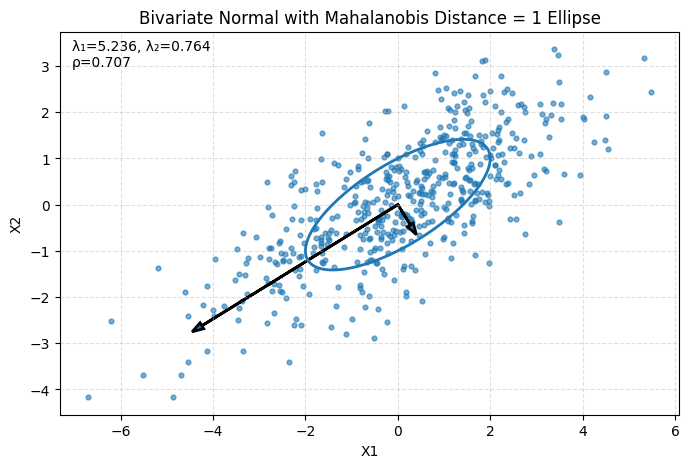

In [ ]:
# --- seed ---
np.random.seed(623)

# --- Params & data ---
mu    = np.array([0., 0.])
Sigma = np.array([[4., 2.],
                  [2., 2.]])
n = 500
X = np.random.multivariate_normal(mu, Sigma, size=n)
df = pd.DataFrame(X, columns=["X1", "X2"])

# --- Eigen system (descending order) ---
vals, vecs = np.linalg.eigh(Sigma)            
order = vals.argsort()[::-1]
vals, vecs = vals[order], vecs[:, order]
if vecs[0,0] > 0: vecs[:,0] *= -1              # first eigenvector: first entry negative
if vecs[0,1] < 0: vecs[:,1] *= -1              # second eigenvector: first entry positive

# --- Mahalanobis c=1 ellipse points: μ + P Λ^{1/2} [cos; sin] ---
t = np.linspace(0, 2*np.pi, 400)
U = np.vstack((np.cos(t), np.sin(t)))
E = mu[:,None] + vecs @ np.diag(np.sqrt(vals)) @ U

# --- Plot ---
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df["X1"], df["X2"], s=12, alpha=0.6)
ax.plot(E[0], E[1], lw=2)

# eigenvectors scaled by λ_i
for lam, v in zip(vals, vecs.T):
    tip = lam * v
    ax.arrow(mu[0], mu[1], tip[0], tip[1],
             length_includes_head=True, head_width=0.15, head_length=0.25, lw=2)


rho = Sigma[0,1] / np.sqrt(Sigma[0,0]*Sigma[1,1]) 

# Made use of GenAI to format the text in the plot
ax.text(0.02, 0.98, f"λ₁={vals[0]:.3f}, λ₂={vals[1]:.3f}\nρ={rho:.3f}",
        transform=ax.transAxes, ha="left", va="top")
ax.set(title="Bivariate Normal with Mahalanobis Distance = 1 Ellipse", xlabel="X1", ylabel="X2")
ax.set_aspect("equal", adjustable="box"); ax.grid(True, ls="--", alpha=0.4)
plt.tight_layout()

# --- Save ---
OUT = Path("outputs/q5"); OUT.mkdir(parents=True, exist_ok=True)
plt.savefig(OUT/"Q5_scatter_md1_ellipse_eigenvectors.png", dpi=200, bbox_inches="tight")
df.to_csv(OUT/"Q5_simulated_data.csv", index=False)

# --- Print diagnostics ---
print("Eigenvalues (desc):", np.array2string(vals, precision=6))
print("Eigenvectors (columns correspond to eigenvalues):")
print(np.array2string(vecs, precision=6))
Sigma_recon = vecs @ np.diag(vals) @ vecs.T
print("‖Σ - PΛPᵀ‖_F =", np.linalg.norm(Sigma - Sigma_recon, ord="fro"))


### Q5 - Insight

* **Shape & orientation ⇒ variable relationship**

  * The MD=1 contour is an **ellipse** whose **major/minor axes** are the eigenvectors of $\Sigma$; the **semi-axis lengths** are $\sqrt{\lambda_1}, \sqrt{\lambda_2}$.
  * A **tilt up-right** (first eigenvector with positive slope) indicates **positive correlation** between $X_1$ and $X_2$; tilt down-right would indicate negative correlation.
  * **Elongation** (axis ratio $\sqrt{\lambda_1/\lambda_2}$) measures strength of linear association/variance anisotropy: the more stretched, the stronger the linear relationship.
  * For $ \Sigma=\begin{bmatrix}4&2\\2&2\end{bmatrix}$: $ \rho=2/\sqrt{4\cdot2}\approx0.707$, $ \lambda_1\approx5.236,\ \lambda_2\approx0.764$ → ellipse is strongly elongated along the first eigenvector (clear positive co-movement).

* **Why Mahalanobis distance gives ellipses (not circles)**

  * Mahalanobis distance is the quadratic form

    $$
    d_M^2(x)=(x-\mu)^\top \Sigma^{-1}(x-\mu).
    $$

    Level sets $d_M^2(x)=c^2$ are **ellipses** because, with $\Sigma=P\Lambda P^\top$, any point on the contour can be written as

    $$
    x=\mu + P\,\Lambda^{1/2}\,u,\quad \|u\|=c,
    $$

    i.e., an **affine transform of a circle** (scale by $\Lambda^{1/2}$, then rotate by $P$).
  * Only when $\Sigma=\sigma^2 I$ (equal variance, no correlation) do these contours reduce to **circles**.


# Question 6


Visual EDA
- Marginal histograms for all numeric variables
- Scatterplot matrix with KDE contours
- One joint plot (scatter + density + marginals)
- Auto insights on multicollinearity/clustering"

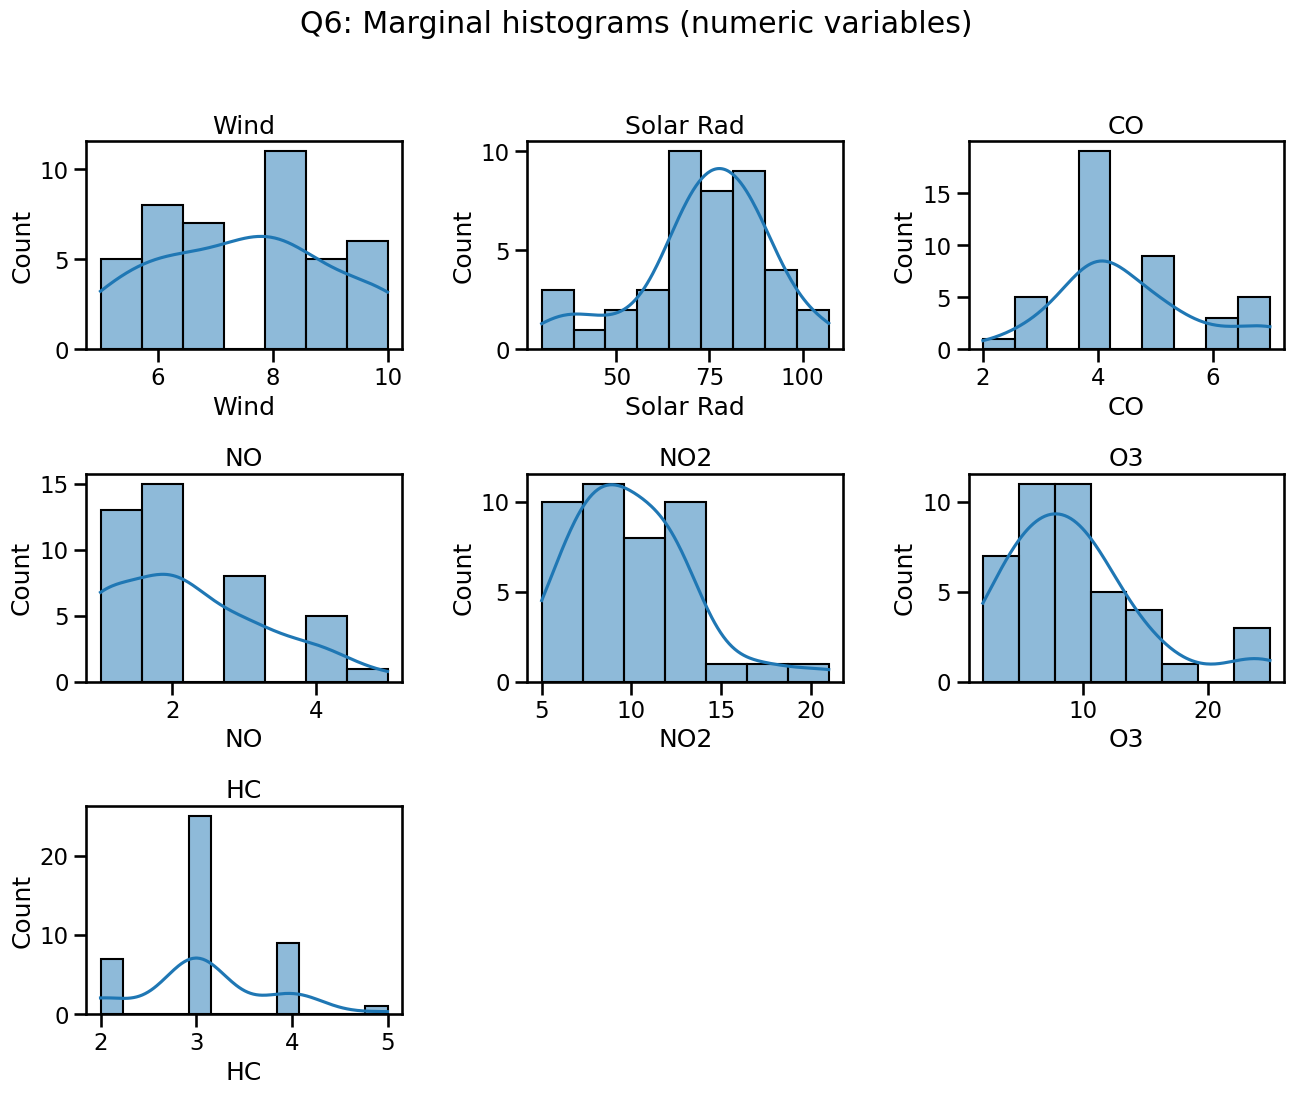

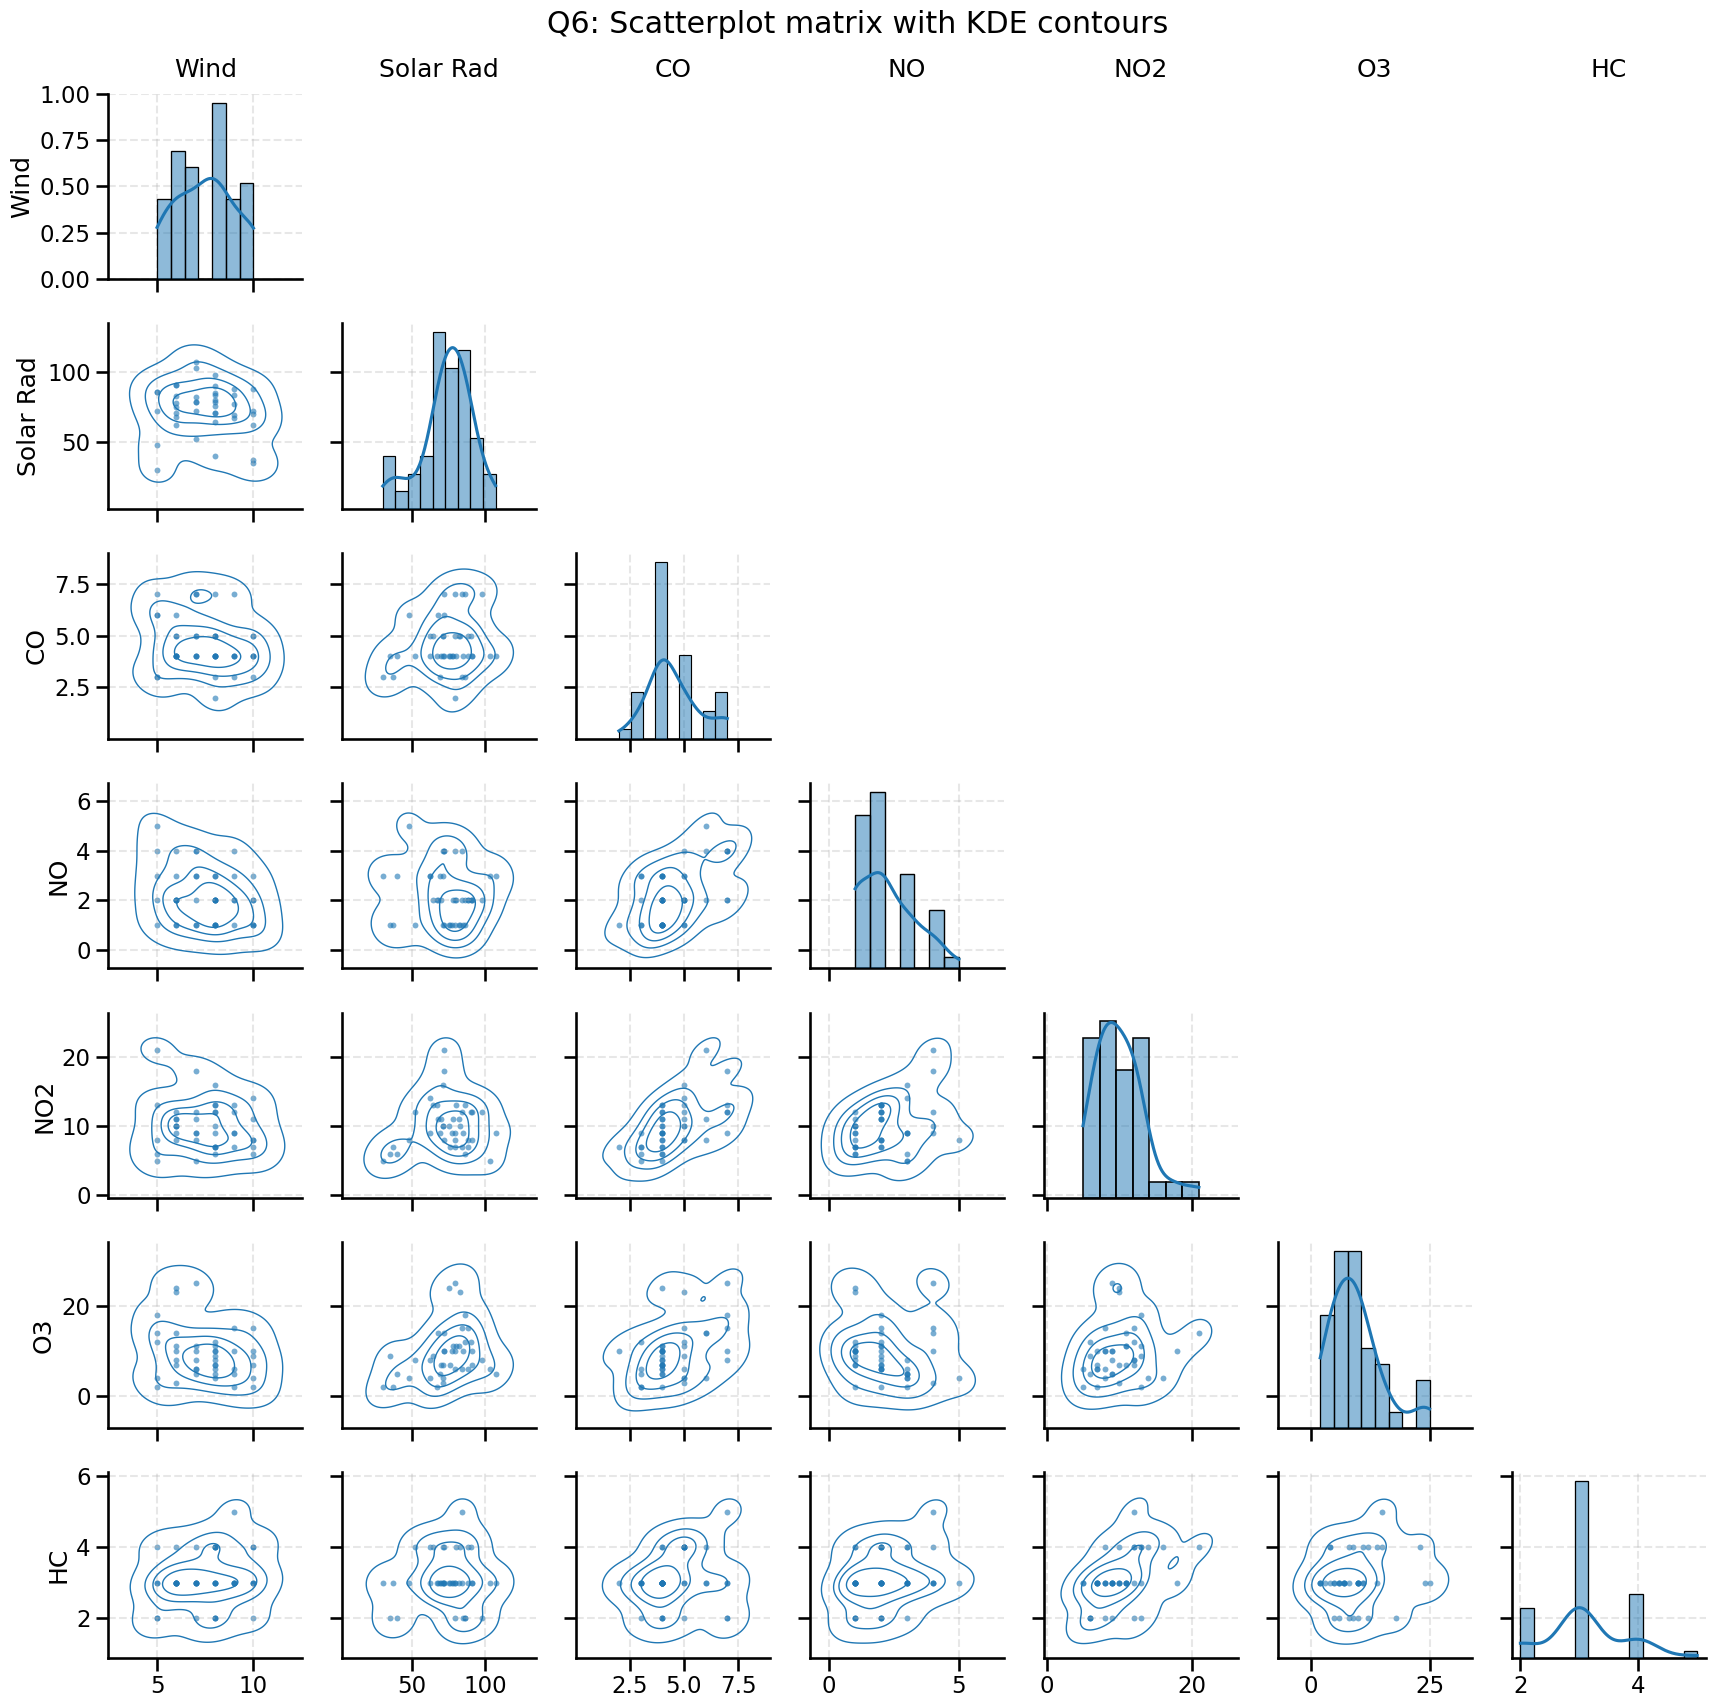

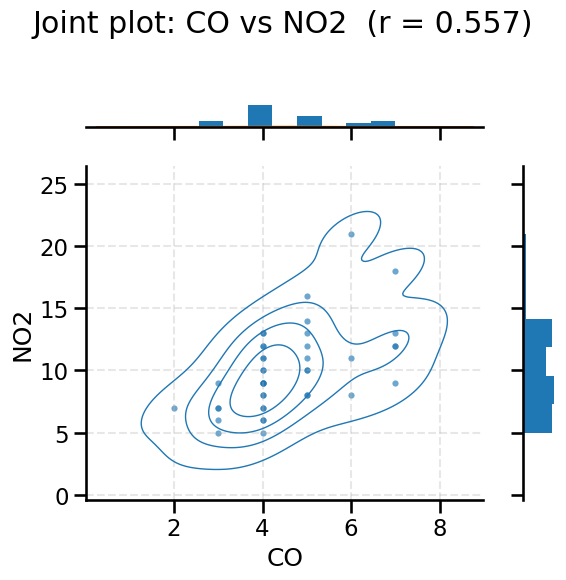

In [11]:
# --- setup ---

np.random.seed(623)
sns.set_context("talk")
OUT = Path("outputs/q6")
(OUT/"figures").mkdir(parents=True, exist_ok=True)
(OUT/"tables").mkdir(parents=True, exist_ok=True)

# --- Load numeric data (floats only) ---
num = (pd.read_csv("airpol.csv")
         .select_dtypes(include=[np.number])
         .apply(pd.to_numeric, errors="coerce").astype(float)
         .dropna())

cols, p = num.columns.tolist(), len(num.columns)

# --- Correlation & pair for joint plot ---
R = num.corr()
R.to_csv(OUT/"tables"/"Q6_correlation.csv", index=True)
if p >= 2:
    A = R.abs().where(~np.eye(p, dtype=bool))
    i, j = np.unravel_index(np.nanargmax(A.values), A.shape)
    pair = (cols[i], cols[j])
else:
    pair = (cols[0], cols[0])

# =============== 1) Marginal histograms ===============
ncols = min(3, p) if p > 1 else 1
nrows = (p + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4.5*ncols, 3.6*nrows))
axes = np.atleast_1d(axes).ravel()
for k, c in enumerate(cols):
    sns.histplot(num[c], bins='auto', kde=True, ax=axes[k]); axes[k].set_title(c)
for k in range(p, axes.size): axes[k].axis("off")
fig.suptitle("Q6: Marginal histograms (numeric variables)", y=1.02)
plt.tight_layout(); plt.savefig(OUT/"figures"/"Q6_histograms.png", dpi=200, bbox_inches="tight"); plt.show()

# =============== 2) Scatterplot matrix (lower) + KDE; labels top & left ===============
def _off(*args, **kwargs): plt.gca().axis("off")
g = sns.PairGrid(num, corner=False, diag_sharey=False)
g.map_lower(sns.scatterplot, s=18, alpha=0.6, linewidth=0)
g.map_lower(sns.kdeplot, levels=5, linewidths=1, fill=False, thresh=0.05)
g.map_diag(sns.histplot, kde=True)
g.map_upper(_off)  # keep axes so we can label top row

# labels at top row and left column
for j, c in enumerate(cols):
    ax = g.axes[0, j]; 
    if ax is not None: ax.set_title(c, pad=12)
for i, c in enumerate(cols):
    ax = g.axes[i, 0];
    if ax is not None: ax.set_ylabel(c)

for ax in g.axes.flat:
    if ax is not None: ax.grid(True, linestyle="--", alpha=0.3); ax.set_xlabel("");  # clean up

g.fig.suptitle("Q6: Scatterplot matrix with KDE contours", y=0.98)
plt.tight_layout(); g.fig.savefig(OUT/"figures"/"Q6_spmatrix_kde.png", dpi=200, bbox_inches="tight"); plt.show()

# ----------------------------
# 3) Joint plot (scatter + density + marginals) 
# ----------------------------
# GenAI was used to help format the text in the plot
xv, yv = pair
J = sns.JointGrid(data=num, x=xv, y=yv, height=6, ratio=6, space=0.05)

# Joint: scatter + KDE contours
J.plot_joint(sns.scatterplot, s=20, alpha=0.65, linewidth=0)
J.plot_joint(sns.kdeplot, levels=5, linewidths=1, fill=False, thresh=0.05)

# Marginals — use matplotlib for the right one (avoids seaborn orientation bug)
x_arr = num[xv].to_numpy(dtype=float)
y_arr = num[yv].to_numpy(dtype=float)

J.ax_marg_x.hist(x_arr, bins='auto')
sns.kdeplot(x=x_arr, ax=J.ax_marg_x, lw=1)

J.ax_marg_y.hist(y_arr, bins='auto', orientation="horizontal")
sns.kdeplot(y=y_arr, ax=J.ax_marg_y, lw=1)

# Clean labels on marginals
J.ax_marg_x.set_xlabel(""); J.ax_marg_y.set_ylabel("")


# Axis labels on joint
J.ax_joint.set_xlabel(xv); J.ax_joint.set_ylabel(yv)
J.ax_joint.grid(True, linestyle="--", alpha=0.3)

# Put title ABOVE the marginals & avoid clipping
r = R.loc[xv, yv]
J.fig.suptitle(f"Joint plot: {xv} vs {yv}  (r = {r:.3f})", y=0.98)
J.fig.tight_layout(rect=[0, 0, 1, 0.96])

path_joint = OUT / "figures" / f"Q6_joint_{xv}_vs_{yv}.png"
J.fig.savefig(path_joint, dpi=200, bbox_inches="tight")
plt.show()


### Q6 - Insight

**Multicollinearity?**

* No severe red flags: max $|r|$ ≈ **0.56** (CO–NO₂), then **0.50** (CO–NO), **0.45** (NO₂–HC), **0.41** (CO–O₃), **0.32** (Solar Rad–O₃). None near the **0.8** danger zone.
* Visuals match: SPLOM shows **moderately tilted bands** among the pollutant block {CO, NO, NO₂, HC}; Wind is **negatively** associated with several pollutants (dispersion effect).
* Conclusion: **moderate collinearity within pollutants**, not “hard” multicollinearity.

**Clustering?**

* Histograms mostly **unimodal** (some skew/heavy tails); KDE contours are single-elliptical with **no cleanly separated clouds**.
* HC shows slight binning/peaks, but nothing that looks like a distinct sub-population at this sample size.
* Conclusion: **no clear clustering**; at most faint subgroup hints.

**How this affects variable selection**

* Keep the pollutant signals but **watch VIFs** if you put CO, NO, NO₂, HC in the same regression; be ready to:

  * drop one representative from the correlated set (e.g., prefer **NO₂** or **CO** based on domain/target), or
  * use **PCA** (pollutant factor) or **ridge**/**lasso** to stabilize coefficients.
* For ozone modeling, **Solar Rad** and **Wind** are useful (Solar Rad–O₃ positive; Wind tends to lower pollutants).
* Revisit after scaling and diagnostics: if any pair hits $|r|\ge 0.8$ or VIF > 5, **reduce/regularize** accordingly.


# Question 7


In [12]:
PCADataset=pd.read_csv("PCADataset1.csv")
print(PCADataset.head())

#get the covariance matrix
cov_matrix=PCADataset.cov()
print("Covariance Matrix:\n", cov_matrix)

          X1         X2         X3         X4         X5         X6
0  19.593297  21.297179  19.545141  17.557679  18.162624  21.882838
1  25.425270  19.990976  17.546186  18.627066  18.638843  21.298481
2  19.741768  18.528718  16.663363  17.603363  20.253647  18.824446
3  20.882660  21.337610  21.494615  22.246616  18.317547  20.668432
4  21.333000  21.066782  20.648673  24.193967  21.454092  18.315792
Covariance Matrix:
           X1        X2        X3        X4        X5        X6
X1  4.000000  0.105077  0.100637 -0.314602  0.137234  1.352729
X2  0.105077  4.000000 -0.472245  0.056653  0.145265  0.837700
X3  0.100637 -0.472245  4.000000 -0.207023 -0.486243  2.504540
X4 -0.314602  0.056653 -0.207023  4.000000  0.376740 -2.580168
X5  0.137234  0.145265 -0.486243  0.376740  4.000000 -1.535792
X6  1.352729  0.837700  2.504540 -2.580168 -1.535792  4.000000


>   All variables have a constant variance of 4

## Covariance vs. Correlation Matrix in PCA

When performing Principal Component Analysis (PCA), you can use either the **covariance matrix** ($S$) or the **correlation matrix** ($R$) to extract principal components. The choice depends on the scale and variance of your variables:

- **Covariance matrix ($S$):**
  - Use when all variables are measured on similar scales and have similar variances.
  - Captures the raw relationships between variables.

- **Correlation matrix ($R$):**
  - Use when variables have very different scales or units, or widely different variances.
  - Standardizes variables to have mean 0 and variance 1, so all variables contribute equally.

### Why does this matter?
- **PCA on standardized variables $Z$** is equivalent to the eigen-decomposition of the correlation matrix $R$:
  $$
  \mathrm{Cov}(Z) = (V^{1/2})^{-1} \Sigma (V^{1/2})^{-1} = R
  $$
  where $V$ is the diagonal matrix of variances.
- If all variables have the **same variance** ($\sigma^2$), then:
  $$
  R = \frac{1}{\sigma^2} S
  $$
  The eigenvectors (principal component directions) of $S$ and $R$ are identical; only the eigenvalues are rescaled.

### In our data
- Every variable has variance $\approx 4$ (equal scale).
- Therefore, using the covariance matrix $S$ is fully justified and will yield the same principal component directions as the correlation matrix $R$.


In [ ]:
# Perform PCA

data=PCADataset
p = 6
pca = PCA(n_components=p)
principal_components = pca.fit_transform(data)



Explained variance ratio: [0.3551 0.1882 0.1649 0.1513 0.1405 0.    ]
Cumulative: [0.3551 0.5433 0.7082 0.8595 1.     1.    ]
k (≥85%): 4, k (≥90%): 5


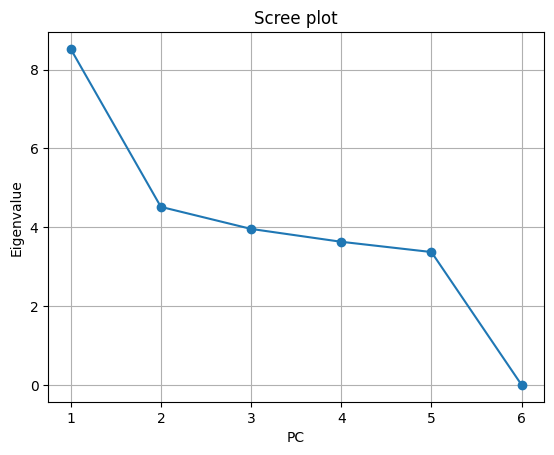

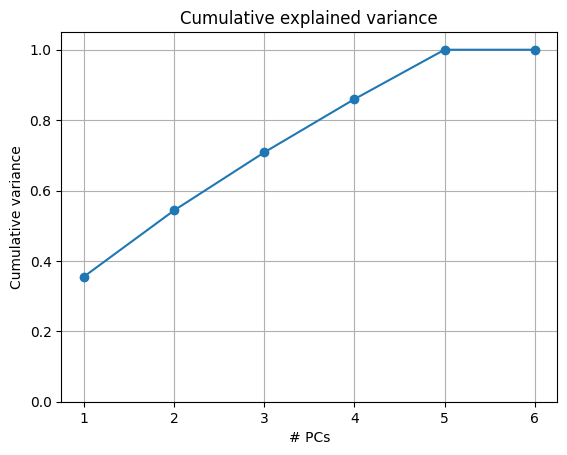

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# data is your numeric matrix (n x p)
pca = PCA().fit(data)                       # fit once on all columns
evr = pca.explained_variance_ratio_         # proportion of variance per PC
cum = np.cumsum(evr)                        # cumulative proportion

# choose k by a target threshold (e.g., 0.85 or 0.90)
k85 = np.argmax(cum >= 0.85) + 1
k90 = np.argmax(cum >= 0.90) + 1
print("Explained variance ratio:", np.round(evr, 4))
print("Cumulative:", np.round(cum, 4))
print(f"k (≥85%): {k85}, k (≥90%): {k90}")

# scree & cumulative plots
plt.figure(); plt.plot(range(1,len(evr)+1), pca.explained_variance_, marker="o")
plt.xlabel("PC"); plt.ylabel("Eigenvalue"); plt.title("Scree plot"); plt.grid(True)

plt.figure(); plt.plot(range(1,len(cum)+1), cum, marker="o")
plt.xlabel("# PCs"); plt.ylabel("Cumulative variance"); plt.title("Cumulative explained variance")
plt.ylim(0,1.05); plt.grid(True); plt.show()




* **Explained variance (per PC):**

  * PC1: **35.51%**
  * PC2: **18.82%** (cumulative **54.33%**)
  * PC3: **16.49%** (cumulative **70.82%**)
  * PC4: **15.13%** (cumulative **85.95%**)
  * PC5: **14.05%** (cumulative **100%**)
  * PC6: **\~0%** (negligible)

* **Dimensionality reduction:**

  * To capture **≥85%** of the variance, keep **k = 4** PCs (85.95%).
  * To capture **≥90%**, keep **k = 5** PCs (\~100%).
  * The **6th component contributes essentially no variance**

* **Interpretation:**

  * Most information is concentrated in the **first 4–5 PCs**; using them provides a strong lower-dimensional summary of the data with minimal loss.
  * A **4-component** model is a good balance between compactness and fidelity; **5 PCs** are near-lossless.
